In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from itertools import *

df = sns.load_dataset("tips")
df.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


Оценим соотношение количества мужчин и женщин.

Курящих и некурящих.

Дней недели.

Времени посещения.

<Axes: >

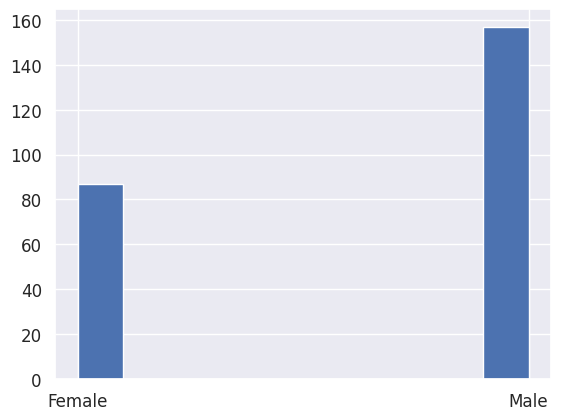

In [ ]:
df['sex'].hist()

<Axes: >

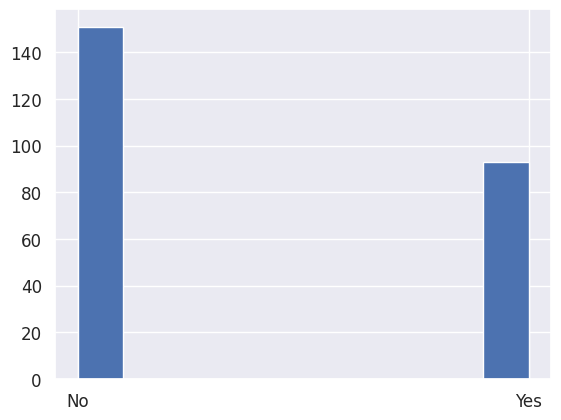

In [ ]:
df['smoker'].hist()

<Axes: >

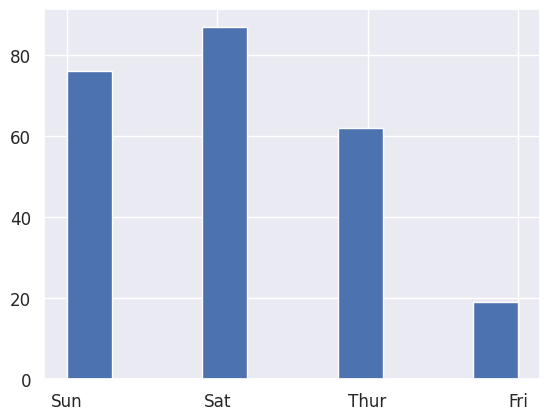

In [ ]:
df['day'].hist()

<Axes: >

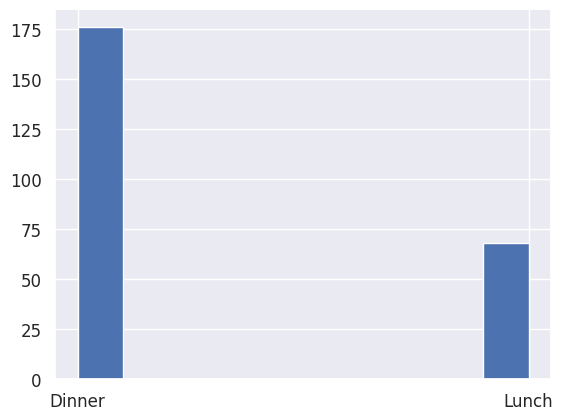

In [ ]:
df['time'].hist()

Пропусков в данном датасете нет

In [ ]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Ряд числовых показателей:
- total_bill - счёт
- tip - чаевые
- size - количество посетителей

Прочие показатели: пол, день недели, время посещения.

Средняя сумма чаевых - 2,998 , что практически совпадает со значением 50% квантиля - 2,9. Стоит проверить выборку на нормальность.

Среднее значение счёта отличается от 50% квантиля. Скорее всего, это связано с тем, что не всегда сумма заказа пропорциональна количеству гостей. 

Среднее значение посетителей = 2,56 , квантиль 50% равен 2, квантиль 75% равен 3. Это значит, что в большинстве случаев заказ делает один или двое человек, группами по 3-6 человек приходят нечасто.

In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Визуальный анализ (гистограммы)

Гистограммы интересующих нас признаков: total_bill, tip, size. Поверх наложено как бы выглядело нормальное распределение с параметрами, рассчитанными на основе выборок.

Нормальный закон распределения состоит в том, что чаще всего встречаются средние по величине значения, а чем больше отклонение у значения в меньшую или большую сторону от среднего, тем реже встречается это значение. 


Распределение параметра size может быть нормальным. Было предположено выше, что наиболее часто посетители приходят вдвоём или в одиночку. На графике видим, что чаще вдвоём. И чем больше отклоняется количество гостей от 2, тем меньше количество таких посещений.

Распределения параметров total_bill и tip тоже похожи на нормальные, за исключением некоторых показателей.

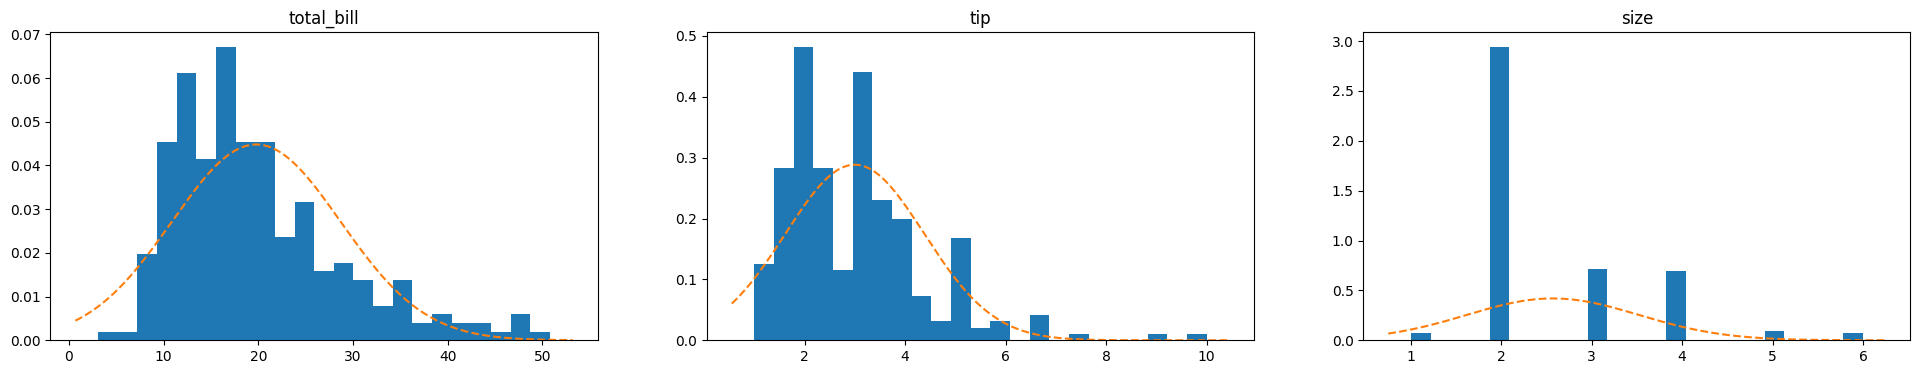

In [ ]:
keys = ['total_bill', 'tip', 'size']

fig, axes = plt.subplots(ncols = len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density = True, bins = 23)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc = loc, scale = scale)
    
    ax.plot(x, y, linestyle = 'dashed')
    ax.set_title(key)

Визуальный анализ (квантили)

Построим Q-Q кривую. Это график, который показывает соответствие между теоретическим значением квантиля на выборке и его реальным значением.

Чем ближе график к графику  y = x , тем более нормальным является распределение значений выборки.

Видно, что распределение параметра size не является нормальным. График не похож на график y = x. Предположение было ошибочным.

total_bill, tip распределены относительно нормально. Ближе всего к нормальному распределение параметра tip.

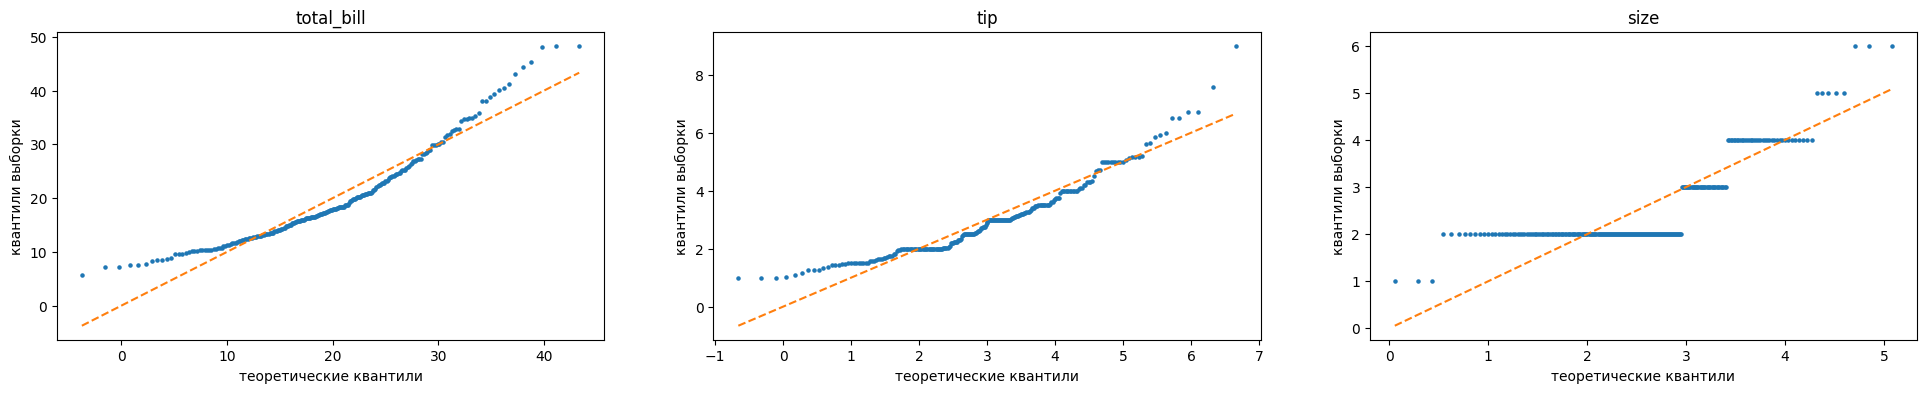

In [ ]:
fig, axes = plt.subplots(ncols = len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color = 'C1', linestyle = 'dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

*Стастические показатели для выборок*

Оценим нормальность выборок также на основании известных характеристик нормального распределения. В частности:

Вероятность попасть в интервал 

от  μ−σ  до  μ+σ  равна  0.68 ,

В интервал от  μ−2σ  до  μ+2σ  —  0.95 ,

В интервал от  μ−3σ  до  μ+3σ  —  0.997 .

Если рассчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными.

Ближе всего в нормальному оказывается распределение tip, как мы уже заметили выше. 

Наибольшее отклонение у параметра size.

In [ ]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

total_bill
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7213114754098361
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9426229508196722
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9836065573770492

tip
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7459016393442623
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9590163934426229
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9877049180327869

size
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7950819672131147
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9631147540983607
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9836065573770492



Регрессия между счётом и чаевыми, есть ли?

Визуализация

Чем больше сумма основного счёта, тем больше разброс суммы оставленных чаевых. 

При total_bill ~ 50 (около максимального значения), гости могли оставить как 10 у.е, так и 2 у.е. на чай.

Гости, заплатившие меньшую сумму ~ 10-20 у.е. (близко к минимальному), оставляли примерно одинаково 2-4 у.е. Разброс небольшой.

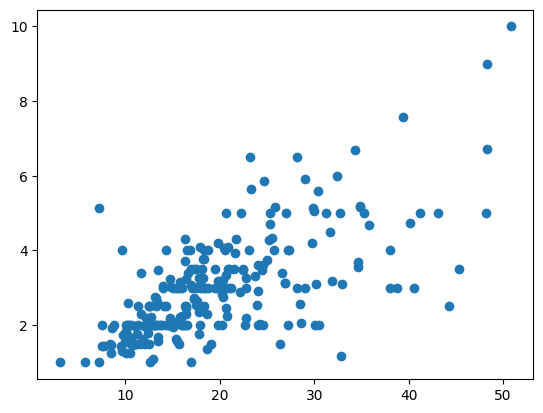

In [ ]:
plt.scatter(df['total_bill'], df['tip'])
plt.show()

Регрессия между счётом и количеством гостей, есть ли?

Нет явной зависимости. Группа из n посетителей может сделать как малый по сумме заказ, так и крупный. 

Но видно, что посетитель, который приходит один, никогда не делает большой заказ на сумму более 10 у.е., а чек группы из 6 человек, напротив, всегда превышает 25 у.е.

Всё-таки, с увеличением кол-ва человек в группе, минимальная сумма заказа возрастет. При этом максимальная сумма не увеличивается. Значит, с увеличением количества посетителей уменьшается разброс total_bill. И, если пришла группа из 5-6 человек, они точно сделают большой заказ.

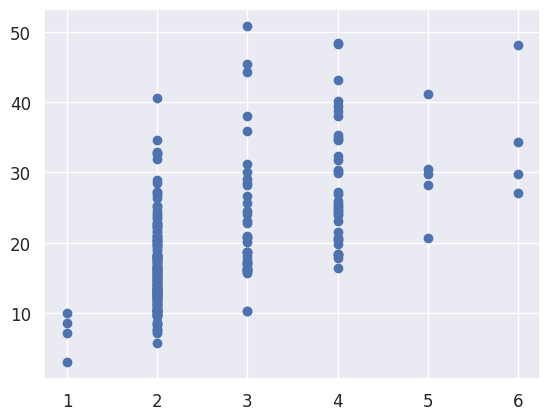

In [ ]:
plt.scatter(df['size'], df['total_bill'])
plt.show()

In [ ]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

Визуализация зависимости

Визуализировав зависимость, мы и вправду видим некоторые связи:

оставленные чаевые - сумма счёта

количество гостей - сумма счёта

In [ ]:
df = sns.load_dataset('tips')

In [ ]:
b1 = np.cov(df['total_bill'], df['tip'], ddof=1)[0, 1] / np.var(df['total_bill'], ddof=1)
b0 = df['tip'].mean() - b1 * df['total_bill'].mean()

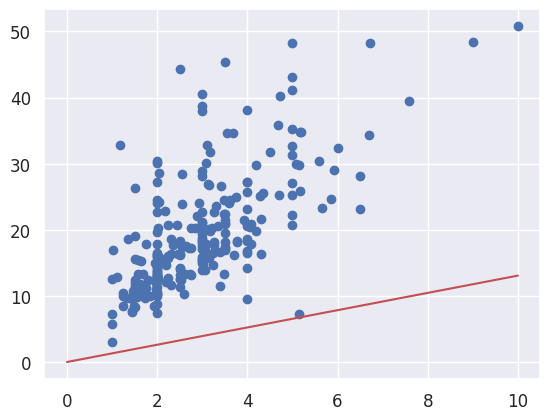

In [ ]:
plt.scatter(df['tip'], df['total_bill'])
x = np.linspace(0, 10, 100)
y = b0 * x + b1
plt.plot(x, y, color = 'r')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

x = np.array(df['total_bill']).reshape((-1, 1))
y = np.array(df['tip'])

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x, y)

LinearRegression()

In [ ]:
y_pred = model.predict(x)

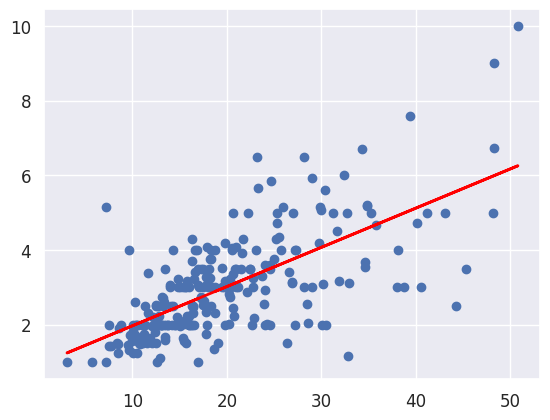

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()

In [ ]:
b1 = np.cov(df['total_bill'], df['size'], ddof=1)[0, 1] / np.var(df['total_bill'], ddof=1)
b0 = df['size'].mean() - b1 * df['total_bill'].mean()

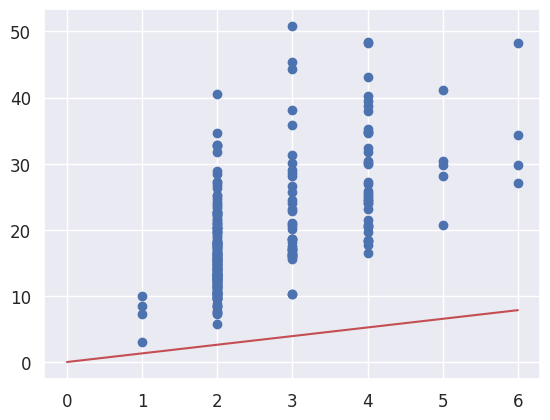

In [ ]:
plt.scatter(df['size'], df['total_bill'])
x = np.linspace(0, 6, 100)
y = b0 * x + b1
plt.plot(x, y, color = 'r')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

x = np.array(df['size']).reshape((-1, 1))
y = np.array(df['total_bill'])

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
y_pred = model.predict(x)

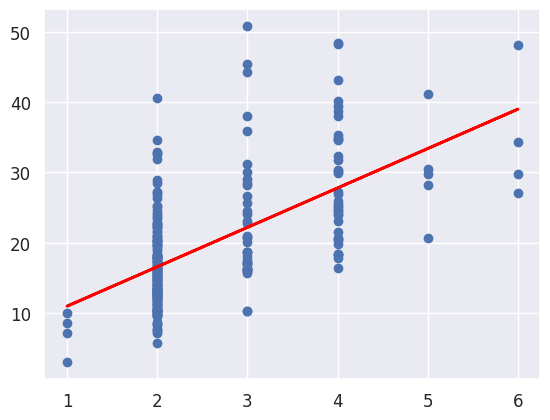

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()

Верно ли, что мужчины оставляют больше чаевых, чем женщины?

Разделим нашу выборку на две части.

Проведём дисперсионный анализ для средний значений оценок по выборке. Так как  F < t , то можно точно сказать, что сумма оставленных чаевых не зависит от пола посетителей.

In [ ]:
def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.1

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F > t

In [ ]:
df1 = df[df['sex'] == 'Male']
df2 = df[df['sex'] != 'Male']

In [ ]:
var_analise(df, df1, df2, 'tip')

False

In [ ]:
var_analise(df, df1, df2, 'total_bill')

True

In [ ]:
res1_mean = df1['total_bill'].mean()
res2_mean = df2['total_bill'].mean()

print(f'Male: {res1_mean}, Female: {res2_mean}')
scatter hue=

Male: 20.744076433121016, Female: 18.056896551724133


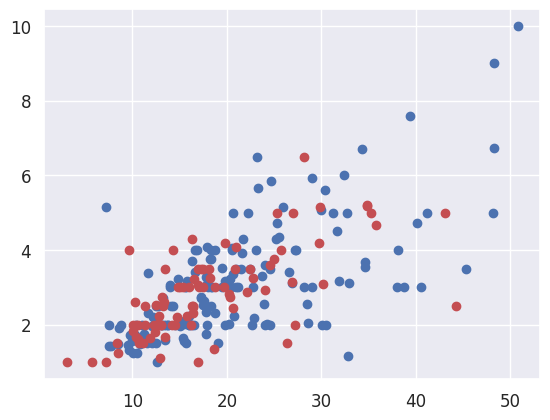

In [ ]:
m = df[df['sex'] == 'Male']
w = df[df['sex'] == 'Female']
plt.scatter(m['total_bill'], m['tip'],c='b')
plt.scatter(w['total_bill'], w['tip'],c='r')
plt.show()

Так же был оценён параметр total_bill. Здесь присутствует зависимость. Сумма общего счёта у мужчин больше, чем у женщин. И вправду, обычно, мужчины заказывают больше, чем женщины.

Проделаем сейчас тоже самое, только предположим, что курящие люди оставляют больше, чем некурящие.
Видим, что сумма счёта и чаевых не зависит от этого параметра.

In [ ]:
df5 = df[df['smoker'] == 'Yes']
df6 = df[df['smoker'] != 'Yes']

In [ ]:
var_analise(df, df5, df6, 'tip')

False

In [ ]:
var_analise(df, df5, df6, 'total_bill')

False

Влияет ли день недели и время посещения на total_bill и tip?

Проведём анализ зависимости оценки от качественного фактора day и time. Построим матрицу корелляции.

Затем проведём дисперсиоанный анализ для всех пар выборок и построим график разброса результата.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from itertools import *

df = sns.load_dataset("tips")

In [ ]:
seperated_days = df['day'].str.get_dummies(',')
dataset_with_days = pd.concat([df, seperated_days], axis = 1, sort = False)
dataset_with_days.head(4)

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun,Thur
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1,0


In [ ]:
list_of_days = seperated_days.columns

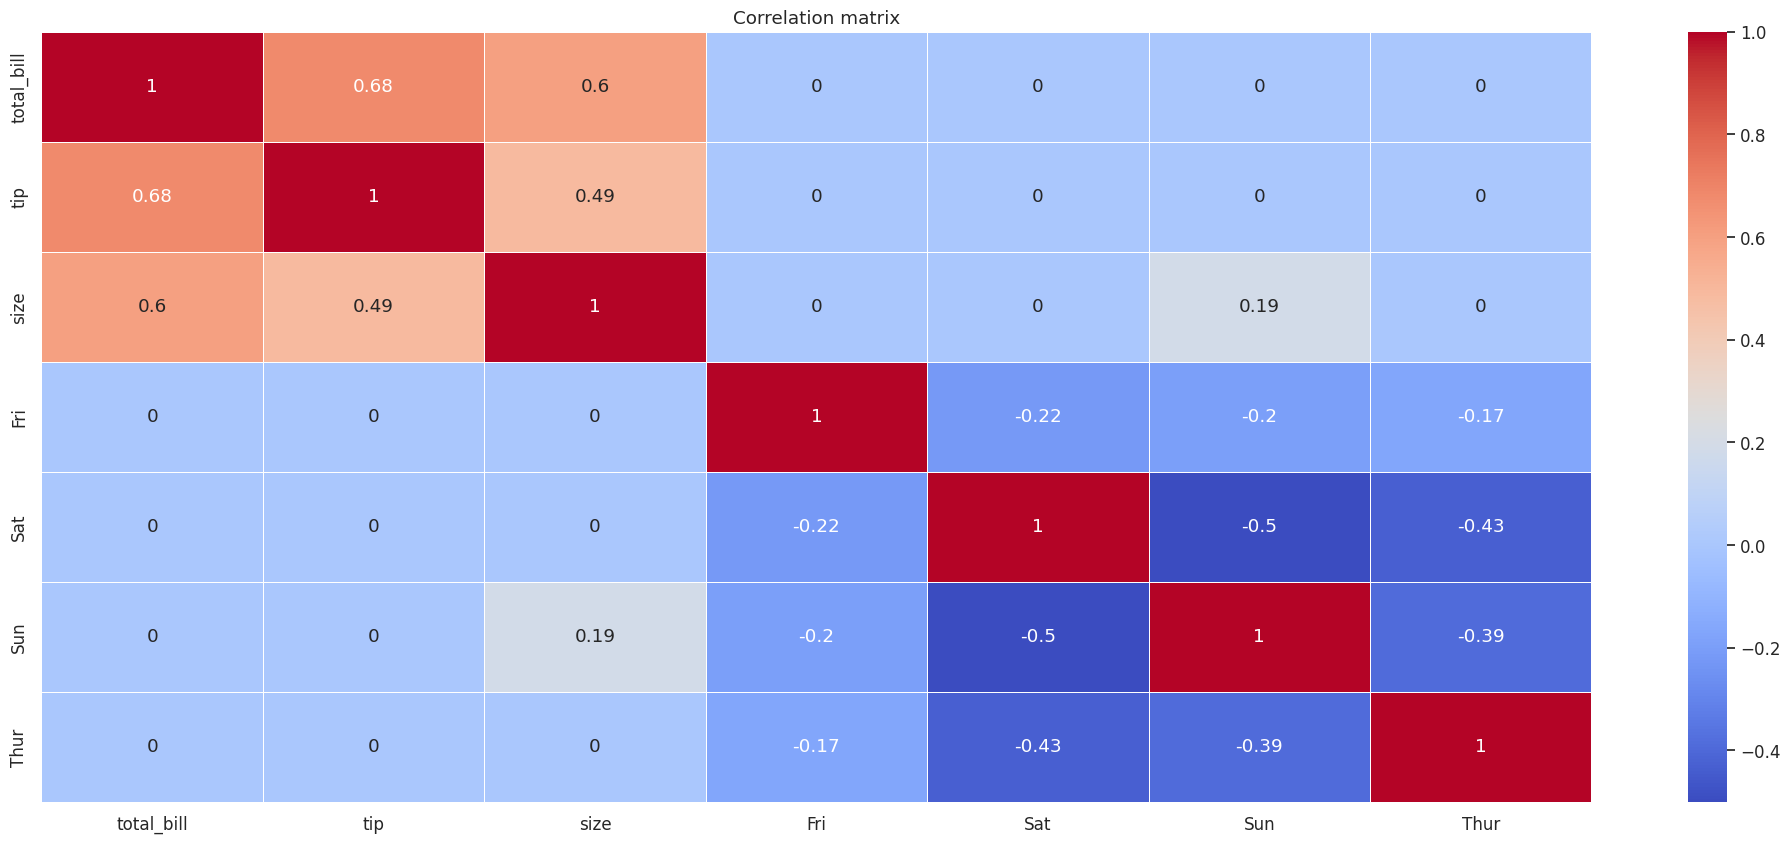

In [ ]:
plt.figure(figsize = (25, 10))

sns.set(font_scale=1.1)

corr_matrix = dataset_with_days.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.15] = 0  # Отсекаем маленькие корелляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [ ]:
seperated_times = df['time'].str.get_dummies(',')
dataset_with_times = pd.concat([df, seperated_times], axis = 1, sort = False)
dataset_with_times.head(4)

,total_bill,tip,sex,smoker,day,time,size,Dinner,Lunch
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0


In [ ]:
list_of_times = seperated_times.columns

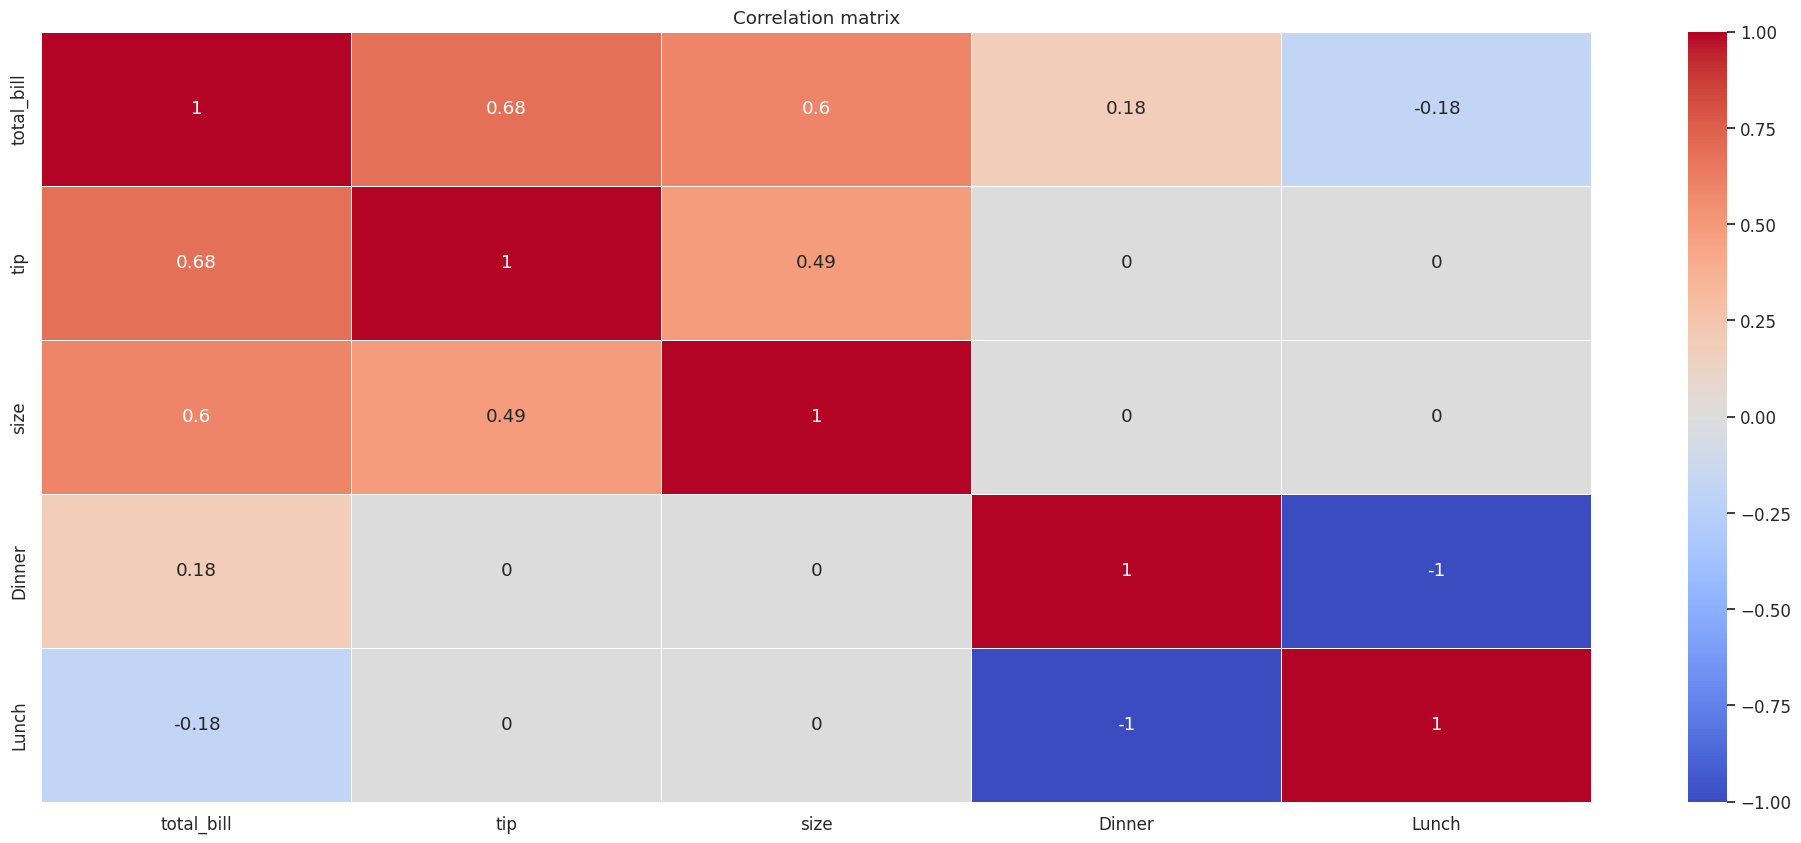

In [ ]:
plt.figure(figsize = (25, 10))

sns.set(font_scale=1.1)

corr_matrix = dataset_with_times.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.15] = 0  # Отсекаем маленькие корелляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [ ]:
import itertools as it
list_of_res = []
for i in it.combinations(list_of_days, 2):
  dict = {}
  dict['g1'] = i[0]
  dict['g2'] = i[1]
  wdf = dataset_with_days[[i[0], i[1], 'total_bill']]
  wdf = wdf.loc[ (wdf[i[0]]==1) | (wdf[i[1]]==1) ]
  wdf1 = wdf[wdf[i[0]]==1]
  wdf2 = wdf[wdf[i[1]]==1]
  
  dict['va'] = var_analise(wdf, wdf1, wdf2, 'total_bill')
  dict['g1_mean'] = wdf1['total_bill'].mean()
  dict['g2_mean'] = wdf2['total_bill'].mean()
  list_of_res.append(dict)

In [ ]:
resframe3 = pd.DataFrame(list_of_res)
resframe3[resframe3['va'] == False]

,g1,g2,va,g1_mean,g2_mean
0,Fri,Sat,False,17.151579,20.441379
2,Fri,Thur,False,17.151579,17.682742
3,Sat,Sun,False,20.441379,21.410000


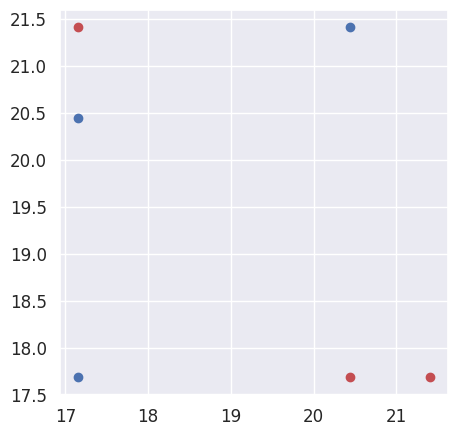

In [ ]:
plt.figure(figsize = (5, 5))

plt.scatter(resframe3.loc[resframe3['va'] == True, 'g1_mean'], resframe3.loc[resframe3['va'] == True, 'g2_mean'], color = 'r')
plt.scatter(resframe3.loc[resframe3['va'] == False, 'g1_mean'], resframe3.loc[resframe3['va'] == False, 'g2_mean'], color = 'b')

In [ ]:
list_of_res = []
for i in it.combinations(list_of_times, 2):
  dict = {}
  dict['g1'] = i[0]
  dict['g2'] = i[1]
  wdf = dataset_with_times[[i[0], i[1], 'total_bill']]
  wdf = wdf.loc[ (wdf[i[0]]==1) | (wdf[i[1]]==1) ]
  wdf1 = wdf[wdf[i[0]]==1]
  wdf2 = wdf[wdf[i[1]]==1]
  
  dict['va'] = var_analise(wdf, wdf1, wdf2, 'total_bill')
  dict['g1_mean'] = wdf1['total_bill'].mean()
  dict['g2_mean'] = wdf2['total_bill'].mean()
  list_of_res.append(dict)

In [ ]:
resframe3 = pd.DataFrame(list_of_res)
resframe3[resframe3['va'] == False]

,g1,g2,va,g1_mean,g2_mean


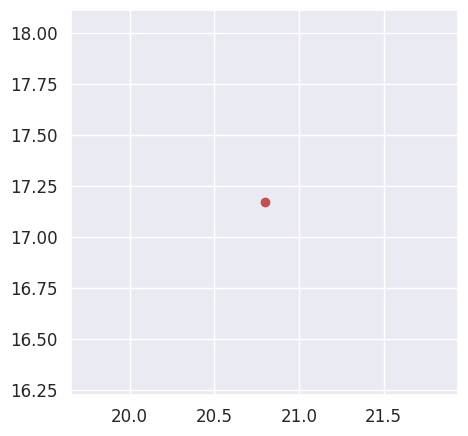

In [ ]:
plt.figure(figsize = (5, 5))

plt.scatter(resframe3.loc[resframe3['va'] == True, 'g1_mean'], resframe3.loc[resframe3['va'] == True, 'g2_mean'], color = 'r')
plt.scatter(resframe3.loc[resframe3['va'] == False, 'g1_mean'], resframe3.loc[resframe3['va'] == False, 'g2_mean'], color = 'b')

При построении корреляционной матрицы были исключены слабые зависимости.

Но на графике days присутствуют как синие, так и красные точки. Это значит, что день недели имеет некое влияние на сумму счёта.

На графике times только одна красная точка. Время посещения действительно влияет на сумму заказа.

Чтобы убедиться, проверим средние значения в каждый из дней недели и сравним их.

In [ ]:
df[df['day'] == 'Thur'].mean()

<ipython-input-205-ee07e58f3a12>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['day'] == 'Thur'].mean()


total_bill    17.682742
tip            2.771452
size           2.451613
dtype: float64

In [ ]:
df[df['day'] == 'Fri'].mean()

<ipython-input-206-06db8a3e17e9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['day'] == 'Fri'].mean()


total_bill    17.151579
tip            2.734737
size           2.105263
dtype: float64

In [ ]:
df[df['day'] == 'Sat'].mean()

<ipython-input-207-23aa2da5e4bd>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['day'] == 'Sat'].mean()


total_bill    20.441379
tip            2.993103
size           2.517241
dtype: float64

In [ ]:
df[df['day'] == 'Sun'].mean()

<ipython-input-208-83700b45aaa5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['day'] == 'Sun'].mean()


total_bill    21.410000
tip            3.255132
size           2.842105
dtype: float64

In [ ]:
df[df['time'] == 'Lunch'].mean()

<ipython-input-209-4b8598e9fb87>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['time'] == 'Lunch'].mean()


total_bill    17.168676
tip            2.728088
size           2.411765
dtype: float64

In [ ]:
df[df['time'] == 'Dinner'].mean()

<ipython-input-211-261d686f5af9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['time'] == 'Dinner'].mean()


total_bill    20.797159
tip            3.102670
size           2.630682
dtype: float64

По выходным средний чек повышается с 17 у.е. до 20. 

А чек за обед и в выходные, и в будние дни в среднем на 3 у.е. больше, чем за ланч.

Наибольшие чаевые оставляют в воскресенье, среднее значение равно 3,25 , а в другие дни около 2,8.

Больше чаевых оставляют гости после обеда, чем после ланча.

Выводы

Выявлена зависимость между количеством посетителей за столом и их счётом. Чем больше гостей, тем больше выходит чек.

Вторая - между суммой счёта и оставленными чаевыми. Также, при росте счёта, увеличивается и кол-во оставленных чаевых. 

Действительно, на практике обычно так и происходит.

По таблицам корреляции и графику разброса не было выявлено влияния дня недели и времени посещения на сумму счёта. Однако, просмотрев средние значения по каждому дню и времени, оказалось, что выходные дни более прибыльны, нежели будние, а в обед заказ более крупный, чем на ланч.

-----------

Просмотрев изначально построенные гистограмы, показывающие соотношение кол-ва мужчин и женщин, курящих и некурящих и т.п., можно заметить, что эти величины не являются приблизительно равными, некоторые даже разнятся в два раза (зафиксированных посещений в обед больше вдвое, чем на ланч и т.д.). Это может влиять на рассчитанные статистики. Например, может быть, если бы было одинаковое количество посещений на обед и на ланч, то средняя цена счёта могла быть одинаковой.